###
## Previous Codes:
###

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cancer = datasets.load_breast_cancer()

X = cancer.data
y = cancer.target

df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y

# Map target to categorical labels
df['target'] = df['target'].map({0: 'Benign', 1: 'Malignant'})

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((569, 30), (569,), (455, 30), (114, 30), (455,), (114,))

In [23]:
from sklearn import svm

In [24]:
clf = svm.LinearSVC(dual = False)
clf.fit(X_train, y_train)


LinearSVC(dual=False)

In [25]:
y_predict = clf.predict(X_test)
y_predict

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1])

In [26]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [27]:
print(metrics.confusion_matrix(y_test, y_predict))

[[39  3]
 [ 2 70]]


In [28]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0, stratify = y)
X.max(), X_train.max(), X_scaled.max()

(4254.0, 11.041842264867746, 12.072680399588076)

In [37]:
clf = svm.LinearSVC(dual = False, max_iter = 10000, C = 0.5)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [34]:
print(metrics.confusion_matrix(y_test, y_predict))

[[40  2]
 [ 1 71]]


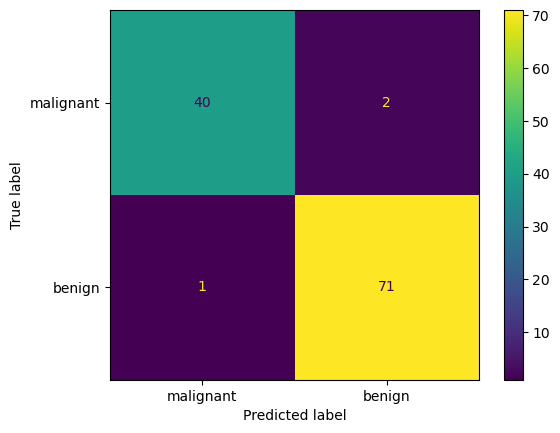

In [40]:
cm = metrics.confusion_matrix(y_test, y_predict)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels = cancer.target_names)
disp.plot()

###
## Checking The Best Kernel:
###

In [70]:
def train_svm(kernel):
    clf = svm.SVC(kernel = kernel, C = 0.8)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    
    print(f"\n\n********* Kernel {kernel} **********\n\n")
    print(metrics.classification_report(y_test, y_predict))
    print(metrics.confusion_matrix(y_test, y_predict))

In [71]:
for kernel in {'linear', 'poly', 'rbf', 'sigmoid'}:
    train_svm(kernel)



********* Kernel poly **********


              precision    recall  f1-score   support

           0       1.00      0.79      0.88        42
           1       0.89      1.00      0.94        72

    accuracy                           0.92       114
   macro avg       0.94      0.89      0.91       114
weighted avg       0.93      0.92      0.92       114

[[33  9]
 [ 0 72]]


********* Kernel rbf **********


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[39  3]
 [ 2 70]]


********* Kernel linear **********


              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                    

####
### Hence Linear Kernel is the best with 0.98 (98%) right prediction accuracy.
###